In [1]:
import numpy as np
import lbg_forecast.nz_sim as nz
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt

2023-12-06 18:26:13.930217: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-06 18:26:13.930242: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-06 18:26:13.930249: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-06 18:26:13.930279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-06 18:26:13.930295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
# initalise fsps emulator
model = em.fsps_emulator()
sps_params = model._sps_params

In [3]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

In [4]:
nzu, nzg, nzr = nz.simulate_nzs(sps_params[:1000000], model, bins)

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


<BarContainer object of 69 artists>

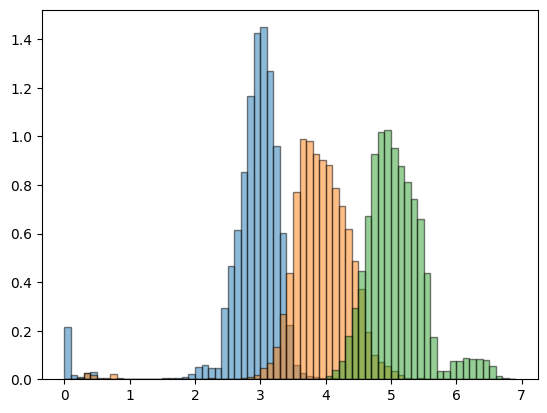

In [7]:
plt.bar(bins[:-1], nzu, width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nzg, width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nzr, width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)

In [6]:
#n_sims = 100
#sim_no = 82

while(sim_no <= 100):
    
    red_mu = np.random.uniform(0.1, 7.0)
    red_sigma = np.random.uniform(1.0, 5.0)
    
    age_mu = np.random.uniform(-3, np.log10(cosmo.age(red_mu).value))
    age_sigma = np.random.uniform(1, 2)
    mass_mu = np.random.uniform(7, 13)
    mass_sigma = np.random.uniform(1, 3)
    tau_mu = np.random.uniform(-1, 2)
    tau_sigma = np.random.uniform(1, 2)
    const_mu = np.random.uniform(0, 1)
    const_sigma = np.random.uniform(0.1, 1)
    met_mu = np.random.uniform(-2.5, 0.5)
    met_sigma = np.random.uniform(0.5, 3.0)
    dust_mu = np.random.uniform(0.0, 2.0)
    dust_sigma = np.random.uniform(0.1, 2.0)
    tburst_mu = np.random.uniform(-3, age_mu)
    tburst_sigma = np.random.uniform(1, 2)
    fburst_mu = np.random.uniform(0, 1)
    fburst_sigma = np.random.uniform(0.1, 1)
    imf = np.random.uniform(1.3, 3.3)
    
    prior_params = (age_mu, age_sigma, mass_mu, mass_sigma, tau_mu, tau_sigma, const_mu, const_sigma, red_mu, red_sigma, met_mu, met_sigma, dust_mu, dust_sigma, tburst_mu, tburst_sigma, fburst_mu, fburst_sigma, imf)
    nz_sim(sim_no, prior_params)
    sim_no+=1